## Building a simple neural network 

The MNIST (Modified National Institute of Standards and Technology dataset) dataset consist of 70,000 images. Each image is in grey scale on 28x28 pixel. The images are handwritten single digits between 0 and 9. 

1. Prepare the data
    1. Obtain the data (Here we are going to import the data from Keras)
    2. Split the data for training and testing
2. Build an ANN model
3. Train the model
4. Evaluate the model 


In [50]:
# Numpy is needed to store and process the data. 
import numpy as np

#Matplot lib is needed to view the MNIST data and the performance metrics
from matplotlib import pyplot as plt


### Prepare the data
Data preparation and exploration is the first step and often the most complex step. Here we will get the directly from Keras.dataset and save some time. 
#### Obtain and understand the data

In [51]:
# Obtain MNIST dataset from Keras.datasets. The dataset is already split into train and test data sets.  
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(len(x_train), len(y_train), len(x_test), len(y_test))

60000 60000 10000 10000


In [52]:
# Each image is stored in a 2D array. Thbe size of the array is 28x28 corresponding to 28x28 pixel.
# Each pixel can have a value between 0 and 255. A value of 0 means white and 255 means black.
print("Dimension of the image data = ", x_train.shape)
print("Minimum pixel value =", np.min(x_train[0]))
print("Maximum pixel value =", np.max(x_train[0]))

Dimension of the image data =  (60000, 28, 28)
Minimum pixel value = 0
Maximum pixel value = 255


In [53]:
# Output vector is a digital label that runs from 0 to 9. 
print("Dimension of the image data = ", y_train.shape)
print("Minimum pixel value =", np.min(y_train))
print("Maximum pixel value =", np.max(y_train))

Dimension of the image data =  (60000,)
Minimum pixel value = 0
Maximum pixel value = 9


In [54]:
print("Initial 10 labels for training dataset")
print(y_train[0:9])


Initial 10 labels for training dataset
[5 0 4 1 9 2 1 3 1]


In [55]:
print("A sample image representation in 2D array")
print(x_train[0])

A sample image representation in 2D array
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0 

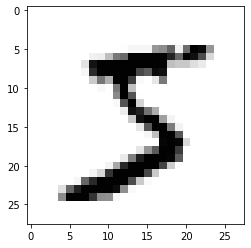

In [56]:
plt.imshow(x_train[0], cmap='Greys')

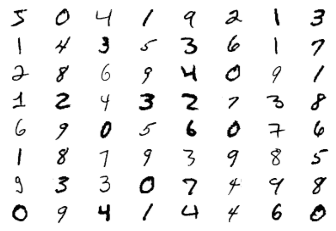

In [57]:
# Lets take a look at some images 
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train[i], cmap='Greys')


### Transform input data for ANN 

* The image is in 2D array. ANNs need the input data as an 1D array.

* The labels are integers. We need to encode these integers as an output vector. Here we can do one-hot encoding and covert these integers (or categories) into vectors in binary numbers. 

* It is better scale the input intensities from 0=255 to 0-1 scale. 

In [58]:
print("2D array of training images ", x_train.shape)
x_train = x_train.reshape((60000, 28 * 28))
print("1D array of training images ", x_train.shape)

print(" ")
print("2D array of test images ", x_test.shape)
x_test = x_test.reshape((10000, 28 * 28))
print("1D array of test images ", x_test.shape)


2D array of training images  (60000, 28, 28)
1D array of training images  (60000, 784)
 
2D array of test images  (10000, 28, 28)
1D array of test images  (10000, 784)


In [59]:
from tensorflow.keras.utils import to_categorical

# Create one-hot encoded vectors using to_categorical
num_classes = 10 # this is equal to the number of digits 0-9 

print("Before transformation, the initial five labes are integers")
print(y_train[0:5])

# to_categorical converts a list integers to one-hot encoded vectors.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("After transformation, the initial five labes are one-hot encoded vectors")
print(y_train[0:5]) # See hpw 5, 0, 4, 1, 9 are represented in one-hot encoding. 


Before transformation, the initial five labes are integers
[5 0 4 1 9]
After transformation, the initial five labes are one-hot encoded vectors
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [60]:
# It is good to rescale the intensity values from 0-255 to 0-1 scale. 
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_test)
print("Dimension of the image data = ", x_train.shape)
print("Minimum pixel value =", np.min(x_train[0]))
print("Maximum pixel value =", np.max(x_train[0]))

Dimension of the image data =  (60000, 784)
Minimum pixel value = 0.0
Maximum pixel value = 1.0


## Building a Deep Neural Network

* Sequential deep neural network -  Input layer, hidden layer(s), output layer. Lets start with a three-layer network - an input, one hidden layer, and the output layer. 
* All layers are one-dimentional
* Input layer must match with the shape of input data (In our case, input layer should have 784 nodes)
* Output layer must match with the possible outcomes (here it is 10)
* The hidden layer(s) can be tunned. Initially, we will choose single hidden layer with 32 nodes. 


In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Sequential models are a series of layers applied linearly.
model = Sequential()

# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
model.add(Dense(units=32, activation='relu', input_shape=(28*28,)))
# This is how the output layer gets added, the 'softmax' activation function ensures
# that the sum of the values in the output nodes is 1. Softmax is very
# common in classification networks. 
model.add(Dense(units=num_classes, activation='softmax'))

# The summary function provides useful information of our network
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


####  How did we get so many parameters? 

* This is a fully connected network. The number of weight parameters are multipied and the number of biases are added. 
* Each neuron has weight and bias. 
* The input layer does not have neurons, it just passes the input data to the hidden layer. Since the input layer is fully connected to hidden layer, the weight factors are multiplied.  32$\times$784 + 32 = 25120
* The connection between hidden and output layers results in 32$\times$10 weight parameters for the next dense layer. The output layer has 10 bias terms. 32$\times$10 + 10 = 330 
* Combinging the above values = 25120 + 330 = 25450

In [62]:
32*784 + 32

25120

## Compiling and Training a Model


Model Compilation requires the following details about the neural network

* neural network architecture
* activation function
* optimizer
* loss function
* accuracy metrics

Keras offers a range of options to build the Neural Network

* Architecture - depth and width of the network defiuned through sequential or functional API.
* Activation functions - ReLU, Sigmoid, softmax, selu, ...
* Optimizer - Adam, SGD, AdaGrad, AdaProp, RMSProp,...
* Loss functions (Objective function for minimization)
    - Probabilistic (binary_crossentropy, categorical_crossentropy,...),
    - Regression (mean_squarred_error, cosine_similarity,...)
    - Hinge (hinge, squarred_hinge, ...)
* Metrics - Accuracy, Probablistic, Regression, Hinge, ...



Model Training requires the following description about how the data will be used for the training

* training data
* batch_size
* number of epochs
* validation_split

`batch_size` is the subset of the training data that is being used to correct the model. For example, a batch_size of 100 from a training data set of 1000 means the model is being trained on a data size of 100 for 10 times. 

In one epoch, the model sees all the items in the data set. 

`validation_split` The training data is split into two parts to check the accuracy of the model. This is to avoid the overfitting. 

In [63]:
# sgd stands for stochastic gradient descent.
# categorical_crossentropy is a common loss function used for categorical classification.
# accuracy is the percent of predictions that were correct.
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

# The network will make predictions for 128 flattened images per correction.
# It will make a prediction on each item in the training set 5 times (5 epochs)
# And 10% of the data will be used as validation data.
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=True, validation_split=.2)

Epoch 1/5
375/375 [==============================] - 5s 12ms/step - loss: 1.5229 - accuracy: 0.5910 - val_loss: 0.8673 - val_accuracy: 0.8241
Epoch 2/5
375/375 [==============================] - 3s 8ms/step - loss: 0.7017 - accuracy: 0.8393 - val_loss: 0.5414 - val_accuracy: 0.8707
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 0.5195 - accuracy: 0.8671 - val_loss: 0.4430 - val_accuracy: 0.8866
Epoch 4/5
375/375 [==============================] - 2s 6ms/step - loss: 0.4481 - accuracy: 0.8804 - val_loss: 0.3959 - val_accuracy: 0.8946
Epoch 5/5
375/375 [==============================] - 3s 9ms/step - loss: 0.4088 - accuracy: 0.8885 - val_loss: 0.3676 - val_accuracy: 0.9009


* Training data = 60,000
* After validation split of 0.2, the remaining 48,000 data were grouped into mini batches of size 128 each. This results in 375 mini batches. 
* In a single epoch, the gradients are evaluated and the model parameters are update for 375 times. 
* batch_size = 16, 32, 64, ... are experimented to find the optimum size. Minimum batch size is 1 and the maximum batch size is equal to the size of training data. batch_size =1 reults in spurious gradient and batch_size = training_data demands computation. 
* Number of epochs can be between 1 and infinite. Small number leads to underfitting and large number leads to overfitting of the model.
* Data Split - Automatic, manual, k-fold

In [64]:
def plot_acc_loss(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')

    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()


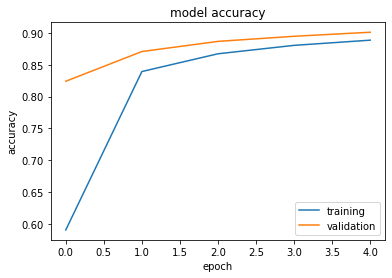

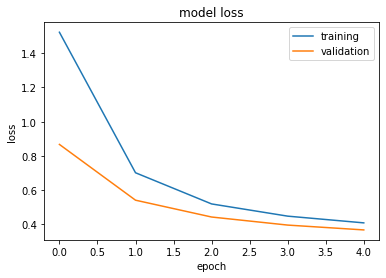

In [65]:
plot_acc_loss(history)

### Lets check how our model do on the test data (unseen data)

In [66]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

313/313 [==============================] - 2s 6ms/step - loss: 0.3697 - accuracy: 0.8974
Test loss: 0.37
Test accuracy: 0.897


## Network depth and Layer width - towards Hyparameter optimization

In [67]:
def create_dense(layer_nodes):
    model = Sequential()
    model.add(Dense(units = layer_nodes[0], activation = 'relu', input_shape= (28*28,) ))
    #model.add(Dense(units=32, activation='relu', input_shape=(28*28,)))
    
    for s in layer_nodes[1:]:
        model.add(Dense(units = s, activation = 'relu'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.2, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plot_acc_loss(history)

    print()
    print("***"*20)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    print("***"*20)
    print()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


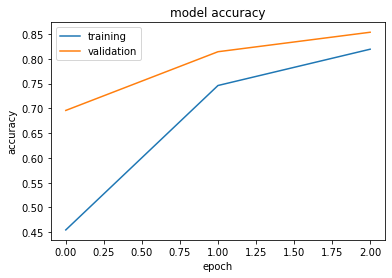

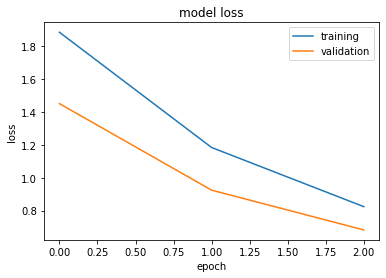


************************************************************
Test loss: 0.689
Test accuracy: 0.846
************************************************************



In [68]:
model = create_dense([32])
evaluate(model, batch_size=256, epochs=3)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


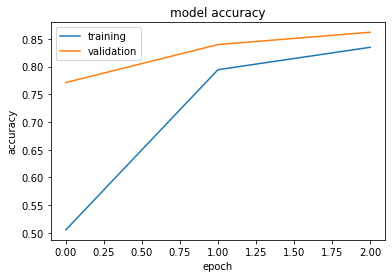

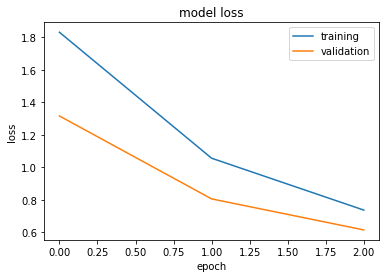


************************************************************
Test loss: 0.622
Test accuracy: 0.859
************************************************************

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_37 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_38 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


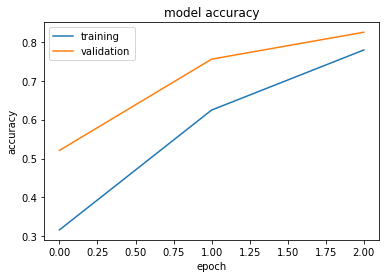

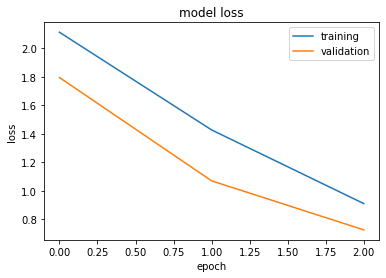


************************************************************
Test loss: 0.729
Test accuracy: 0.82
************************************************************

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_40 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_41 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_42 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


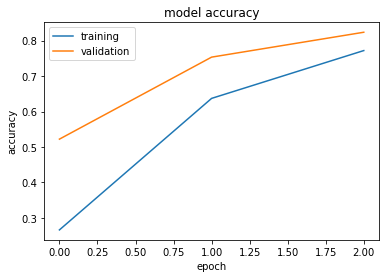

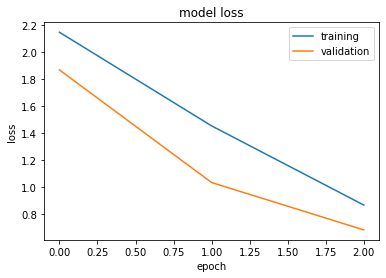


************************************************************
Test loss: 0.691
Test accuracy: 0.817
************************************************************

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_44 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_45 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_46 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_47 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
___________________

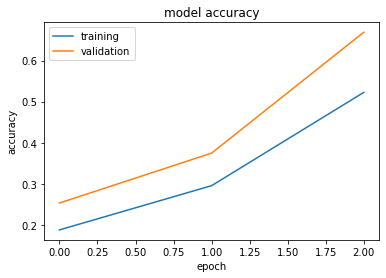

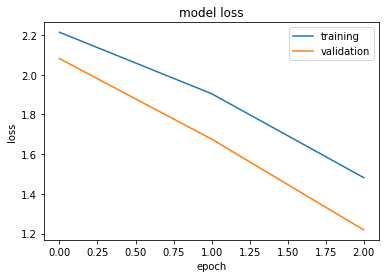


************************************************************
Test loss: 1.23
Test accuracy: 0.651
************************************************************



In [69]:
for layers in range(1, 5):
    
    model = create_dense([32] * layers)
    evaluate(model, batch_size=256, epochs=3)

### Layer Width

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_49 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


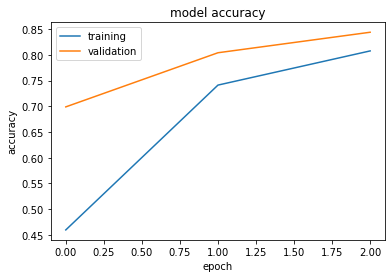

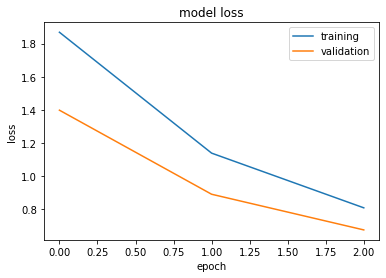


************************************************************
Test loss: 0.684
Test accuracy: 0.839
************************************************************

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_51 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


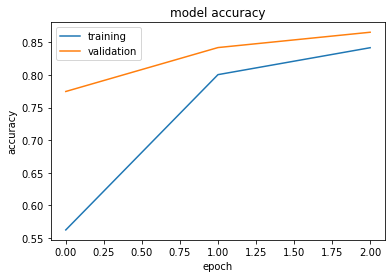

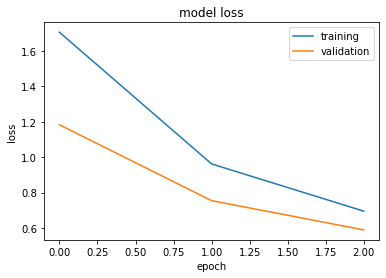


************************************************************
Test loss: 0.595
Test accuracy: 0.866
************************************************************

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_53 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


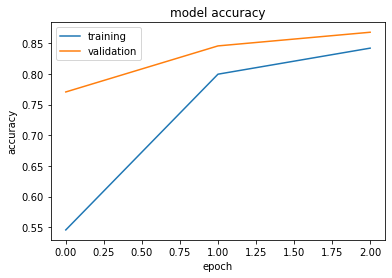

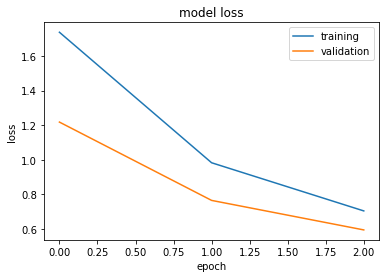


************************************************************
Test loss: 0.596
Test accuracy: 0.866
************************************************************

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_55 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


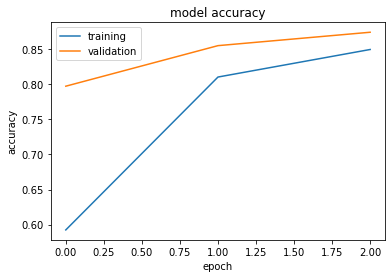

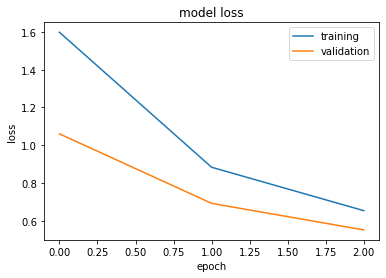


************************************************************
Test loss: 0.559
Test accuracy: 0.871
************************************************************

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_57 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


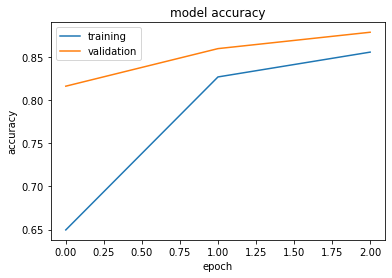

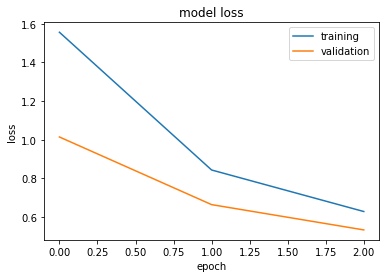


************************************************************
Test loss: 0.539
Test accuracy: 0.876
************************************************************



In [70]:
for nodes in [32, 64, 128, 256, 512]:
    model = create_dense([nodes])
    evaluate(model, batch_size=256, epochs=3)

## Hyperparameter optimzation

* Number of Epochs
* Hidden Layers (Number of Layers)
* Hidden Units in a layer (Width of each layer)
* Activations Functions
* Learning Rate